<center> <h1>Data Wrangling Project</h1>
<h4> Data Analysis Nanodegree (Udacity)</h4><br><hr></center>

- [Project Requirements](#req)
- [Gather](#gather)
- [Assess](#assess)
- [Clean](#clean)
- [Storing, Analyzing, and Visualizing](#extra)
<hr>

In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id="req"></a>
## Project Requirements - Data Wrangling

The first step is to wrangle the provided dataset using the three-steps approach:

### Gather
- `twitter-archive-enhanced.csv` provided dataset containing tweets from WeRateDogs twitter account
- `image-predictions.tsv` is a dataset with dogs breed inference based on tweet's pictures, to be retrieved using python package `Requests`
- using `Tweepy` API to retrieve information from Twitter for each tweet based on its tweet ID. Save all tweets JSON to a `tweet_json.txt` file (each tweet per row)

### Assess

To perform a visually and programatic assessment of the data looking for quality and tidiness issues, **detect and document at least 8 quality issues and 2 tidiness issue**.

### Clean

To perform cleaning according to the findings from `Assess` phase.


## Further Requirements
### Key Points

Key points to keep in mind when data wrangling for this project:

- You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
- Cleaning includes merging individual pieces of data according to the rules of tidy data.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
- You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

### Storing, Analyzing, and Visualizing Data for this Project

Store the clean DataFrame(s) in a CSV file with the main one named `twitter_archive_master.csv`. If additional files exist because multiple tables are required for tidiness, name these files appropriately. *Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do)*.

Analyze and visualize your wrangled data here. **At least three (3) insights and one (1) visualization must be produced**.

<hr>
<a id="gather"></a>
# Gather

`twitter-archive-enhanced.csv`

In [268]:
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')

`image-predictions.tsv`

In [269]:
import requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

r = requests.get(url)

if (r.status_code == 200):
    with open("image-predictions.tsv", "w") as file:
        file.write(r.text)
    
    # This is a TSV file
    df_img_pred = pd.read_csv('image-predictions.tsv', delimiter='\t')
else:
    print('[!] The URL is not accessible, file not gathered!')


`tweet_json.txt`

<font color="red">**[!] Clean the Twitter API keys prior to submission**</font>

In [270]:
consumer_key = ""
consumer_secret = ""

In [271]:
import tweepy

# seth OAuth credentials to start API
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth)

In [ ]:
tweets = []

# retrieve extra data for each tweet from provided dataset
for tweet_id in df_twitter.tweet_id.unique():
    try:
        tweet_json = api.get_status(tweet_id)._json
        favorite_count = tweet_json['favorite_count']
        retweet_count = tweet_json['retweet_count']
        #retweeted = tweet_json['retweeted']
    except:
        print('[!] There is an issue with Tweet ID:', tweet_id)
        favorite_count = np.nan
        retweet_count = np.nan
        #retweeted = np.nan
        
    tweets.append([tweet_id, favorite_count, retweet_count])
    

In [273]:
df_tweets = pd.DataFrame(tweets, columns=['tweet_id', 'favorite_count', 'retweet_count'])
df_tweets.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,36054.0,7676.0
1,892177421306343426,31097.0,5675.0
2,891815181378084864,23411.0,3763.0
3,891689557279858688,39325.0,7850.0
4,891327558926688256,37565.0,8447.0


In [274]:
df_tweets.to_csv('tweets-extra.csv', index=False)

## Full dataframe (tweets + images predictions + extra data)

In [ ]:
df = df_twitter.merge(df_tweets, on='tweet_id', how='left')
df.to_csv('tweets_json.csv', index=False)

In [276]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,36054.0,7676.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,31097.0,5675.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,23411.0,3763.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,39325.0,7850.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,37565.0,8447.0


<hr>
<a id="assess"></a>
# Assess

## Criteria

### Quality

> Checking for content issues (low quality data)

> - missing data
> - invalid data
> - innacturate data
> - inconsistent data

### Tidiness
> Checking for structural issues (untidy data)

> - each variable is a column
> - each observation is a row
> - each observational unit is a table

## Visual Assessment

In [277]:
pd.set_option('display.max_columns', 500)
df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
2220,668484198282485761,NaN,NaN,2015-11-22 17:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Good teamwork between these dogs. One is on lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668484198...,9,10,None,None,None,None,None,NaN,NaN
1408,699072405256409088,NaN,NaN,2016-02-15 03:27:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",ERMAHGERD 12/10 please enjoy https://t.co/7WrA...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699072405...,12,10,None,None,None,None,None,NaN,NaN
1153,725729321944506368,NaN,NaN,2016-04-28 16:52:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lola. She's a Butternut Splishnsplash....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/725729321...,12,10,Lola,None,None,None,None,NaN,NaN
987,749036806121881602,NaN,NaN,2016-07-02 00:27:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dietrich. He hops at random. Other dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749036806...,8,10,Dietrich,None,None,None,None,NaN,NaN
437,820078625395449857,NaN,NaN,2017-01-14 01:22:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've never wanted to go to a camp more in my e...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820078625...,12,10,None,None,None,None,None,19991.0,6369.0


In [278]:
df_img_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1507,785639753186217984,https://pbs.twimg.com/media/CucnLmeWAAALOSC.jpg,1,porcupine,0.978042,False,sea_urchin,0.006106,False,echidna,0.005442,False
170,668992363537309700,https://pbs.twimg.com/media/CUi9ARGWUAEyWqo.jpg,1,lynx,0.287506,False,tabby,0.206048,False,koala,0.081419,False
789,690597161306841088,https://pbs.twimg.com/media/CZV-c9NVIAEWtiU.jpg,1,Lhasa,0.097500,True,koala,0.091934,False,sunglasses,0.091505,False
549,677530072887205888,https://pbs.twimg.com/media/CWcSAI-WUAAOB9W.jpg,1,Staffordshire_bullterrier,0.689259,True,Norwegian_elkhound,0.026121,True,American_Staffordshire_terrier,0.023075,True
1071,716439118184652801,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True


From **Visual Assessment** the following issues are identified:

#### Quality

> **df** table (tweets):
>- `in_reply_to_status_id` with NaN values	
>- `in_reply_to_user_id` with NaN values
>- `timestamp` can have a better descriptive name like `tweet_post_timestamp`
>- `source` containing all HTML a tag, instead of just the url (href attribute)
>- `retweeted_status_id` with NaN values	
>- `retweeted_status_user_id` with NaN values
>- `retweeted_status_timestamp` with NaN values
>- `doggo` / `floffer` / `pupper` / `popper` - "None" as text
>- `text` can have a better descriptive name like `tweet_text`
>- `expanded_url` can have a better descriptive name like `tweet_url`

>**df_img_pred** table (predictions from pictures):
>- the prediction columns can have a better descriptive name than `p1`, `p1_conf`, `p1_dog` (prediction#_)
>- `jpg_url` can have a better descriptive name such as `image_url`

#### Tidiness
>**df** table (tweets):
> - `doggo` / `floffer` / `pupper` / `popper` (all can be in just one column `dogtionary` or `dog_stage`)
> - once this table relates to **tweets** information about `in_reply` or `retweet` can be moved to another table (different observation units)
> - `rating_numerator` and `rating_denominator` can be converted to a single column `rating`

>**df_img_pred** table (predictions from pictures):
>- None


## Programmatic Assessment

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
favorite_count                87

In [280]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,favorite_count,retweet_count
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000,878.000000,878.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433,13797.469248,4721.937358
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237,14515.628291,5320.041775
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000,0.000000,1.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000,5206.500000,1963.250000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000,10537.000000,3236.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000,19364.750000,5537.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000,132551.000000,56453.000000


In [281]:
df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [282]:
df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [283]:
sum(df['tweet_id'].duplicated())

0

In [284]:
df_img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [285]:
df_img_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


From **Programmatic Assessment** the following issues are identified:

#### Quality
> **df** table (tweets):
>- `timestamp` not in date format
>- `retweeted_status_timestamp` not in date format
>- `rating_denominator` it is normally **10**, there are unusual values
>- `rating_numerator` it is normmally **little above 10**, but there values less than 10 or really higher
>- from the **2355** entries, many of the columns have empty values those derived from `retweeted` (just 181 non-empty), those derived from `in_reply` (78 non-empty), those derived from Twitter API and those from picture inference (2075 non-empty)


#### Tidiness
> Regarding the last point above and the **visual assessment**, retweeted and in_reply cases must be removed from the tweets dataset.


<hr>
<a id="clean"></a>

# Clean

> Perform the Clean step of Data Wrangling using the process
> 1. Define
> 2. Code
> 3. Test

### Create copies for cleaning

In [286]:
# Create copies for cleaning
df_clean = df.copy()
df_img_pred_clean = df_img_pred.copy()

### Define (Tidiness Issues)

1. remove tweets that are from `in_reply` and `retweeted` *(retweets an replies are out of scope)*
2. convert `doggo` / `floffer` / `pupper` / `popper` columns to a single column `dog_stage`

<font color="red">According with requirements at least 2</font>

### Code (Tidiness Issues)

In [287]:
# 1.
# mask to keep just tweets without in_reply and retweeted
mask = df_clean.in_reply_to_status_id.isnull() & df_clean.in_reply_to_user_id.isnull() & \
    df_clean.retweeted_status_id.isnull() & df_clean.retweeted_status_user_id.isnull() \
    & df_clean.retweeted_status_timestamp.isnull()

In [288]:
# 2.
# applying mask to retrieve just tweets without in_reply and retweeted
df_clean = df_clean[mask]
df_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 
                                  'retweeted_status_id', 'retweeted_status_user_id',
                                 'retweeted_status_timestamp'], axis=1, inplace=True)


In [289]:
# 2.
# keep just one column dog_stage instead of four (doggo, floofer, pupper, puppo)

df_clean["dog_stage"] = (df_clean['doggo'] + df_clean['floofer'] + \
                                    df_clean['pupper'] + \
                                    df_clean['puppo']).replace(to_replace=r"(None)", value='', regex=True)

df_clean.drop(columns=["doggo", "floofer", "pupper", "puppo"], axis=1, inplace=True)

### Test (Tidiness Issues)

In [290]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
favorite_count        693 non-null float64
retweet_count         693 non-null float64
dog_stage             2097 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 196.6+ KB


### Define (Quality Issues)


>**df** table (tweets):
>1. `doggo` / `floffer` / `pupper` / `popper` - "None" as text
>2. `timestamp` not in date format
>3. `timestamp` can have a better descriptive name like `tweet_post_timestamp`
>4. `rating_denominator` it is normally **10**, there are unusual values
>5. `rating_numerator` it is normmally **little above 10**, but there values less than 10 or really higher
>6. `source` containing all HTML a tag, instead of just the url (href attribute)
>7. `text` can have a better descriptive name like `tweet_text`
>8. `expanded_url` can have a better descriptive name like `tweet_url`

>**df_img_pred** table (predictions from pictures):
>8. the prediction columns can have a better descriptive name than `p1`, `p1_conf`, `p1_dog` (prediction#_)
>9. `jpg_url` can have a better descriptive name such as `image_url`


**Important note:** *Many of the previous identified quality issues were related with in_reply_* and retweeted_* fields, with the tidiness step to keep just tweets removing these fields, more quality issues were fixed.*

<font color="red">According to requirements, at least 8</font>

### Code (Quality Issues)

In [291]:
# 1.
# The None was removed on previous step of Tidiness in this part the "" is replaced by NaN
df_clean["dog_stage"].replace(to_replace="", value=np.nan, inplace=True)

In [292]:
# 2.
# converting timestamp to datetime format
df_clean["timestamp"] = pd.to_datetime(df_clean.timestamp)

In [293]:
# 3.
# change all rating_denominator that are different of 10 to 10
df_clean.loc[df_clean["rating_denominator"] != 10, "rating_denominator"] = 10

In [294]:
# 4.
# change all rating_numerator that are less than 10 to 10
df_clean.loc[df_clean["rating_numerator"] < 10, "rating_numerator"] = 10

# change all rating_numerator that are greater than 14 to 14, there are no problem to overrate a dog =)
df_clean.loc[df_clean["rating_numerator"] > 14, "rating_numerator"] = 14

In [295]:
# 5.
df_clean["source"] = df_clean["source"].replace(to_replace="<a href=\"(.+)\"\s.+", value=r'\1', regex=True)

In [296]:
# 6. and 7.
df_clean.rename(columns={"text" : "tweet_text", 
                         "timestamp" : "tweet_post_timestamp",
                         "expanded_urls" : "tweet_url"}, inplace=True)

In [297]:
# 8.
df_img_pred_clean.rename(columns={"jpg_url" : "image_url", \
    "p1" : "prediction1", \
    "p1_conf" : "prediction1_confidence", \
    "p1_dog" : "prediction1_is_dog", \
    "p2" : "prediction2", \
    "p2_conf" : "prediction2_confidence", \
    "p2_dog" : "prediction2_is_dog", \
    "p3" : "prediction3", \
    "p3_conf" : "prediction3_confidence", \
    "p3_dog" : "prediction3_is_dog"}, inplace=True)

### Test (Quality Issues)

In [298]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                2097 non-null int64
tweet_post_timestamp    2097 non-null datetime64[ns]
source                  2097 non-null object
tweet_text              2097 non-null object
tweet_url               2094 non-null object
rating_numerator        2097 non-null int64
rating_denominator      2097 non-null int64
name                    2097 non-null object
favorite_count          693 non-null float64
retweet_count           693 non-null float64
dog_stage               336 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 196.6+ KB


In [299]:
df_clean

,tweet_id,tweet_post_timestamp,source,tweet_text,tweet_url,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_stage
0,892420643555336193,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,36054.0,7676.0,NaN
1,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,31097.0,5675.0,NaN
2,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,23411.0,3763.0,NaN
3,891689557279858688,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,39325.0,7850.0,NaN
4,891327558926688256,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,37565.0,8447.0,NaN
5,891087950875897856,2017-07-29 00:08:17,http://twitter.com/download/iphone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,18930.0,2833.0,NaN
6,890971913173991426,2017-07-28 16:27:12,http://twitter.com/download/iphone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,11004.0,1844.0,NaN
7,890729181411237888,2017-07-28 00:22:40,http://twitter.com/download/iphone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,60744.0,17130.0,NaN
8,890609185150312448,2017-07-27 16:25:51,http://twitter.com/download/iphone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,26046.0,3900.0,NaN
9,890240255349198849,2017-07-26 15:59:51,http://twitter.com/download/iphone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,29773.0,6660.0,doggo


In [300]:
df_img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                  2075 non-null int64
image_url                 2075 non-null object
img_num                   2075 non-null int64
prediction1               2075 non-null object
prediction1_confidence    2075 non-null float64
prediction1_is_dog        2075 non-null bool
prediction2               2075 non-null object
prediction2_confidence    2075 non-null float64
prediction2_is_dog        2075 non-null bool
prediction3               2075 non-null object
prediction3_confidence    2075 non-null float64
prediction3_is_dog        2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Iterative Wrangling - Tidiness #2

### Define
- Create a single column `rating` instead of two `rating_numerator` and `rating_denominator`

### Code

In [301]:
df_clean["rating"] = (df_clean["rating_numerator"] / df_clean["rating_denominator"]).round(2)

df_clean.drop(columns=['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

### Test

In [302]:
df_clean

,tweet_id,tweet_post_timestamp,source,tweet_text,tweet_url,name,favorite_count,retweet_count,dog_stage,rating
0,892420643555336193,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,36054.0,7676.0,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,31097.0,5675.0,NaN,1.3
2,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,23411.0,3763.0,NaN,1.2
3,891689557279858688,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,39325.0,7850.0,NaN,1.3
4,891327558926688256,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,37565.0,8447.0,NaN,1.2
5,891087950875897856,2017-07-29 00:08:17,http://twitter.com/download/iphone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,18930.0,2833.0,NaN,1.3
6,890971913173991426,2017-07-28 16:27:12,http://twitter.com/download/iphone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,11004.0,1844.0,NaN,1.3
7,890729181411237888,2017-07-28 00:22:40,http://twitter.com/download/iphone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,None,60744.0,17130.0,NaN,1.3
8,890609185150312448,2017-07-27 16:25:51,http://twitter.com/download/iphone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,26046.0,3900.0,NaN,1.3
9,890240255349198849,2017-07-26 15:59:51,http://twitter.com/download/iphone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,29773.0,6660.0,doggo,1.4


<hr>
<a id="extra"></a>
# Storing, Analyzing, and Visualizing

## Storing
- Store the `df_clean` and `df_img_pred_clean` as CSV files
- Store a merged version of `df_clean` and `df_img_pred_clean` as a SQL file

In [303]:
df_clean.to_csv('twitter_archive_master.csv', index=False)
df_img_pred_clean.to_csv('image-predictions-wrangled.csv', index=False)

In [304]:
df_full = df_clean.merge(df_img_pred_clean, how='left', on='tweet_id')

In [306]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///tweets.db')
df_full.to_sql('master', engine, index=False)

In [307]:
pd.read_sql('SELECT * FROM master', engine).head()

,tweet_id,tweet_post_timestamp,source,tweet_text,tweet_url,name,favorite_count,retweet_count,dog_stage,rating,image_url,img_num,prediction1,prediction1_confidence,prediction1_is_dog,prediction2,prediction2_confidence,prediction2_is_dog,prediction3,prediction3_confidence,prediction3_is_dog
0,892420643555336193,2017-08-01 16:23:56.000000,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,36054.0,7676.0,None,1.3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,0.0,bagel,0.085851,0.0,banana,0.076110,0.0
1,892177421306343426,2017-08-01 00:17:27.000000,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,31097.0,5675.0,None,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,1.0,Pekinese,0.090647,1.0,papillon,0.068957,1.0
2,891815181378084864,2017-07-31 00:18:03.000000,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,23411.0,3763.0,None,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,1.0,malamute,0.078253,1.0,kelpie,0.031379,1.0
3,891689557279858688,2017-07-30 15:58:51.000000,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,39325.0,7850.0,None,1.3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,0.0,Labrador_retriever,0.168086,1.0,spatula,0.040836,0.0
4,891327558926688256,2017-07-29 16:00:24.000000,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,37565.0,8447.0,None,1.2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,1.0,English_springer,0.225770,1.0,German_short-haired_pointer,0.175219,1.0


## Analyzing and Visualizing

<font color="red">According to requirements, at least three (3) insights and one (1) visualization must be produced</font>

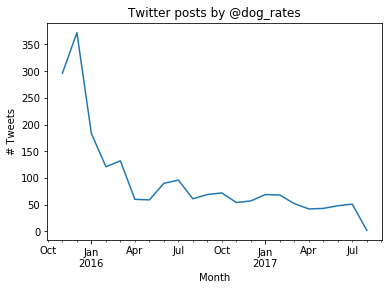

In [309]:
# tweets per month/year by WeRateDogs
df_clean.set_index('tweet_post_timestamp').resample('MS').size().plot()
plt.xlabel('Month')
plt.ylabel('# Tweets')
plt.title('Twitter posts by @dog_rates');

In [310]:
# Evaluating the 10 most predicted dogs
df_img_pred_clean[df_img_pred_clean.prediction1_is_dog == True]['prediction1'].value_counts().nlargest(5)

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
Name: prediction1, dtype: int64

In [311]:
# Evaluating the 10 most predicted as non dogs (what is it ?)
df_img_pred_clean[df_img_pred_clean.prediction1_is_dog == False]['prediction1'].value_counts().nlargest(5)

seat_belt      22
web_site       19
teddy          18
tennis_ball     9
dingo           9
Name: prediction1, dtype: int64

In [312]:
dogs_success = df_full[df_full.prediction1_is_dog == True][['prediction1', 'favorite_count', 'retweet_count']]
dogs_success = dogs_success.groupby('prediction1').agg(sum)
dogs_success.sort_values(by=['favorite_count', 'retweet_count'], ascending=False).head(5)

,favorite_count,retweet_count
prediction1,,
golden_retriever,1184011.0,307724.0
Pembroke,707845.0,171113.0
Labrador_retriever,577068.0,139988.0
Chihuahua,471677.0,136729.0
French_bulldog,405554.0,97789.0


In [319]:
df_clean['rating'].describe()*10

count    20970.000000
mean        11.177873
std          1.181653
min         10.000000
25%         10.000000
50%         11.000000
75%         12.000000
max         14.000000
Name: rating, dtype: float64

In [321]:
df_clean['dog_stage'].value_counts().nlargest(3)

pupper    221
doggo      72
puppo      23
Name: dog_stage, dtype: int64

# Insights and Discussion
- According with the provided dataset the @WeRateDogs account on Twitter reduced its post in comparison with last months from 2015 and kept an average of 50 posts per month in 2016.

- Considering the predictor used to categorize the posts, the top 5 dogs (most posted) are:

<table border=1>  
    <tr>
        <td align="center" >#1 Golden Retriever
            <img src="https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg" style="width: 200px;" />
        </td>
        <td align="center" >#2 Labrador Retriever
            <img src="https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg" style="width: 200px;" />
        </td>
        <td>#3 Pembroke<img src="https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg" style="width: 200px;" /></td>
    </tr>
    <tr>
        <td align="center" >#4 Chihuahua
        <img src="https://pbs.twimg.com/media/CT-pKmRWIAAxUWj.jpg" style="width: 200px;" /></td>    
        <td align="center" >#5 Pug
        <img src="https://pbs.twimg.com/media/C8576jrW0AEYWFy.jpg" style="width: 200px;" /></td>
        <td align="center" >&nbsp;</td>
    </tr>
</table>

- The top 5 wrong predictions (greater number of occurences) for those that the predictor do not predicted as a dog are:

<table border=1>  
    <tr>
        <td align="center" >#1 seat_belt (22 times)
            <img src="https://pbs.twimg.com/media/CXgHoLnWAAA8i52.jpg" style="width: 200px;" />
        </td>
        <td align="center" >#2 web_site (19 times)
            <img src="https://pbs.twimg.com/media/CsU4NKkW8AUI5eG.jpg" style="width: 200px;" />
        </td>
        <td>#3 teddy (18 times)
            <img src="https://pbs.twimg.com/media/CugtKeXWEAAamDZ.jpg" style="width: 200px;" />
        </td>
    </tr>
    <tr>
        <td align="center" >#4 tennis_ball (9 times)
        <img src="https://pbs.twimg.com/media/CVPeX2dWwAEwyaR.jpg" style="width: 200px;" /></td>    
        <td align="center" >#5 dingo (9 times)
        <img src="https://pbs.twimg.com/media/CU8ceuxWUAALMEo.jpg" style="width: 200px;" /></td>
        <td align="center" >&nbsp;</td>
    </tr>
</table>

- And finally, the top 5 most successful dogs (those with more retweets and favorites) are:
> 1. Golden Retriever
> 2. Pembroke
> 3. Labrador Retriever
> 4. Chihuahua
> 5. French Bulldog
>
> It is required to evaluate these rates according to the number of posts to confirm if those breeds are the most successful!

- Regarding the ratings of the dogs
> - The mean rating is 11 with 1.2 std (11/10)
> - the most occurrence are **puppers** (221)